In [20]:
from nde_ae import LayerNorm, ResidualBlock, ResidualNet, RAE

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torchsummary import summary #https://github.com/sksq96/pytorch-summary
torch.manual_seed(1234)
np.random.seed(1234)

In [38]:
myrae = RAE(201,10,num_blocks=1, hidden_size=32)

In [39]:
summary(myrae, input_size=(201, 1))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 32]           6,464
            Linear-2                   [-1, 32]           1,056
           Dropout-3                   [-1, 32]               0
            Linear-4                   [-1, 32]           1,056
     ResidualBlock-5                   [-1, 32]               0
            Linear-6                   [-1, 10]             330
            Linear-7                   [-1, 32]             352
            Linear-8                   [-1, 32]           1,056
           Dropout-9                   [-1, 32]               0
           Linear-10                   [-1, 32]           1,056
    ResidualBlock-11                   [-1, 32]               0
           Linear-12                  [-1, 201]           6,633
Total params: 18,003
Trainable params: 18,003
Non-trainable params: 0
---------------------------------

In [40]:
from astropy.io import fits 

In [27]:
stokes = fits.open("/home/milic/data/muram_from_rebecca/muram_pole_mu_1.fits")[0].data

In [28]:
stokes.shape

(600, 600, 4, 201)

In [29]:
data = stokes[:,:,0,:].reshape(600*600,201)

In [30]:
data /= np.mean(data[:,0])

In [31]:
data.shape

(360000, 201)

In [32]:
data = data.reshape(360000,201)

In [33]:
data_torch = torch.from_numpy(data.astype('float32'))

In [34]:
test = myrae.forward(data_torch[0:5])

In [35]:
test.shape

torch.Size([5, 201])

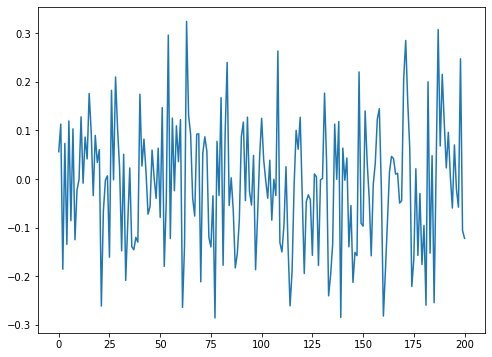

In [36]:
plt.figure(figsize=[8,6])
plt.plot(test.detach().numpy()[0])

### Training!!!!

In [ ]:
optimizer = torch.optim.Adam(myrae.parameters(), lr=1e-1)
loss_fn = nn.MSELoss()

to_train = data[:100000]
to_train_torch = torch.from_numpy(to_train.astype('float32'))
#print(to_train_torch.shape)

for loop in range(500):
    optimizer.zero_grad()        #reset gradients
    out = myrae.forward(to_train_torch)          #evaluate model
    loss = loss_fn(out, to_train_torch) #calculate loss
    loss.backward()              #calculate gradients
    optimizer.step()             #step fordward
    if loop%10==0: print(f' It : {loop:3d} - loss : {loss.item():.4f} - residual std : {np.sqrt(loss.item()):.4f}')

 It :   0 - loss : 0.9170 - residual std : 0.9576
 It :  10 - loss : 9571.8984 - residual std : 97.8361
 It :  20 - loss : 1844079.0000 - residual std : 1357.9687
 It :  30 - loss : 6581614.0000 - residual std : 2565.4656
 It :  40 - loss : 118598.4219 - residual std : 344.3812
 It :  50 - loss : 75042.3359 - residual std : 273.9386
 It :  60 - loss : 38494.6445 - residual std : 196.2005
 It :  70 - loss : 15526.2900 - residual std : 124.6045
 It :  80 - loss : 5545.4927 - residual std : 74.4681
 It :  90 - loss : 2402.9304 - residual std : 49.0197
 It : 100 - loss : 1431.5146 - residual std : 37.8354
 It : 110 - loss : 1082.6372 - residual std : 32.9035
 It : 120 - loss : 944.6662 - residual std : 30.7354
 It : 130 - loss : 852.1925 - residual std : 29.1923
 It : 140 - loss : 766.9911 - residual std : 27.6946
 It : 150 - loss : 696.4117 - residual std : 26.3896
 It : 160 - loss : 638.3036 - residual std : 25.2647
 It : 170 - loss : 586.3528 - residual std : 24.2147
 It : 180 - loss : 

In [17]:
test = myrae.forward(to_train_torch[0])

In [18]:
test.shape

torch.Size([1, 201])

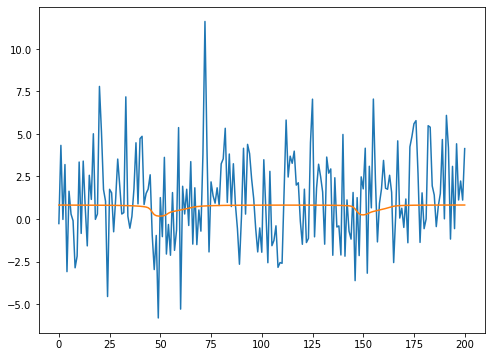

In [19]:
plt.figure(figsize=[8,6])
plt.plot(test.detach().numpy()[0])
plt.plot(to_train_torch.detach().numpy()[0])